In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import numpy.fft as fft

1.005349649148734e-05


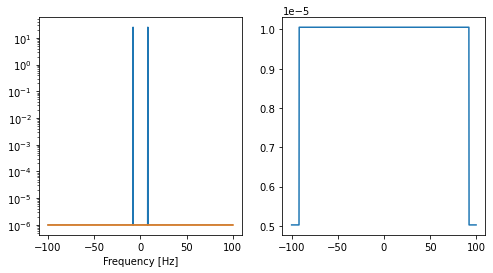

In [61]:
fs = 200 #Hz
N = 1000
t = np.linspace(0, (N-1)/fs, N)
dt = t[1]-t[0]
f = fft.fftfreq(t.shape[-1], d=t[1]-t[0])
f = np.fft.fftshift(f)
omega = 2*np.pi*f

A = 100e-3 #100mK
fc = 8 #Hz
omega_c = 2*np.pi*fc #rad/s
B = 0.001e-3 #mK

df = f[1]-f[0]
G1 = np.zeros_like(f)
G1[np.argmin(np.abs(f-fc))] = A * omega_c / df
G1[np.argmin(np.abs(f+fc))] = A * omega_c / df
G1 += np.ones_like(f) * B

sigma_wn = 1e-6 #s/sqrt(Hz)
G2 = np.ones(len(f)) * sigma_wn
G2_extend = np.ones(len(f) * 2) * sigma_wn

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(f, G1)
ax[0].plot(f, G2)
ax[0].set_xlabel('Frequency [Hz]')
ax[0].set_yscale('log')

G1_G2 = np.convolve(G1, G2, mode='same') * df
ax[1].plot(f, G1_G2)


print(2 * sigma_wn * (A*omega_c + B*fs) )

In [60]:
print( 2 * sigma_wn * omega_c * A)
print( 2 * sigma_wn * B * fs )

1.0053096491487338e-05
4e-10
